In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import kagglehub

In [6]:
path = kagglehub.dataset_download("fedesoriano/the-boston-houseprice-data")

In [8]:
df = pd.read_csv(path + r'\boston.csv')

In [9]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [13]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
def evaluating_strength(correlation_coefficient):
    abs_r = abs(correlation_coefficient)
    if correlation_coefficient == 0:
        return "No correlation"
    elif 0 < abs_r < 0.3:
        return "Weak correlation (linear relationship is very weak or negligible)"
    elif 0.3 <= abs_r < 0.5:
        return "Moderate correlation"
    elif 0.5 <= abs_r < 0.7:
        return "Strong correlation"
    elif 0.7 <= abs_r < 1:
        return "Very strong correlation"
    elif abs_r == 1:
        return "Perfect correlation"
    else:
        return "Invalid value for r"

### Spearman's Correlation Analysis

In [16]:
r1, p1 = stats.pearsonr(df['CRIM'], df['MEDV'])

print (f"\nSpearman's correlation coefficient(r)    -> {r1}\n{evaluating_strength(r1)}\nPvalue     ->{p1:.4f}")


Spearman's correlation coefficient(r)    -> -0.3883046085868116
Moderate correlation
Pvalue     ->0.0000


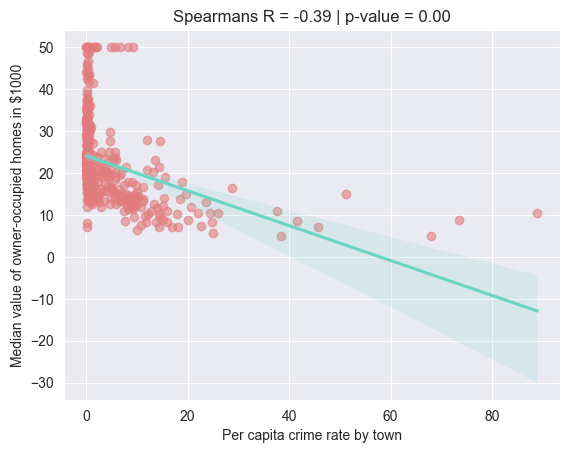

In [19]:
sns.regplot(x='CRIM', y='MEDV', data=df,
            line_kws={'color': '#6cd4c5'},
            scatter_kws={'alpha': 0.6, 'color': '#e27c7c'})

plt.title(f'Spearmans R = {r1:.2f} | p-value = {p1:.2f}')
plt.xlabel('Per capita crime rate by town')
plt.ylabel('Median value of owner-occupied homes in $1000')
plt.grid(True)
plt.show()

In [20]:
r2, p2 = stats.pearsonr(df['RM'], df['LSTAT'])

print (f"\nSpearman's correlation coefficient(r)    -> {r2}\n{evaluating_strength(r2)}\nPvalue     ->{p2:.4f}")


Spearman's correlation coefficient(r)    -> -0.6138082718663957
Strong correlation
Pvalue     ->0.0000


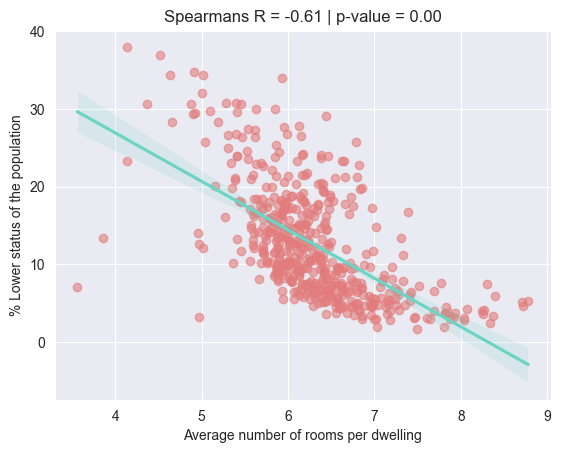

In [21]:
sns.regplot(x='RM', y='LSTAT', data=df,
            line_kws={'color': '#6cd4c5'},
            scatter_kws={'alpha': 0.6, 'color': '#e27c7c'})

plt.title(f'Spearmans R = {r2:.2f} | p-value = {p2:.2f}')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('% Lower status of the population')
plt.grid(True)
plt.show()

In [22]:
r3, p3 = stats.pearsonr(df['RM'], df['AGE'])

print (f"\nSpearman's correlation coefficient(r)    -> {r3}\n{evaluating_strength(r3)}\nPvalue     ->{p3:.4f}")


Spearman's correlation coefficient(r)    -> -0.24026493104775154
Weak correlation (linear relationship is very weak or negligible)
Pvalue     ->0.0000


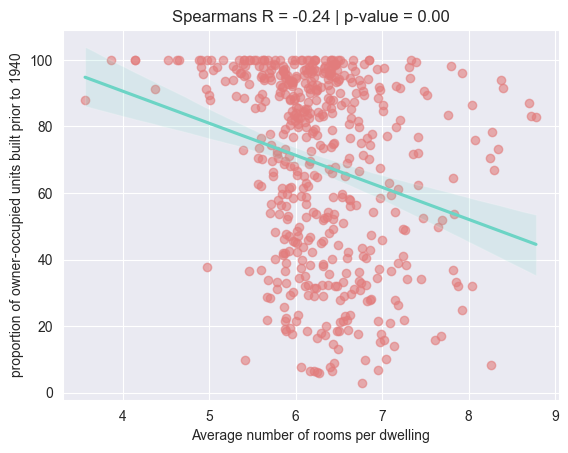

In [23]:
sns.regplot(x='RM', y='AGE', data=df,
            line_kws={'color': '#6cd4c5'},
            scatter_kws={'alpha': 0.6, 'color': '#e27c7c'})

plt.title(f'Spearmans R = {r3:.2f} | p-value = {p3:.2f}')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('proportion of owner-occupied units built prior to 1940')
plt.grid(True)
plt.show()